In [17]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the Windy Grid World environment
class WindyGridWorld:
    def __init__(self, rows, cols, wind, start, goal):
        self.rows = rows
        self.cols = cols
        self.wind = wind
        self.start = start
        self.goal = goal
        self.action_space = ['up', 'down', 'left', 'right']
        
    def step(self, state, action):
        i, j = state
        if action == 'up':
            i = max(0, i - self.wind[j])
        elif action == 'down':
            i = max(min(i + self.wind[j], self.rows - 1), 0)
        elif action == 'left':
            j = max(j - 1, 0)
        elif action == 'right':
            j = min(j + 1, self.cols - 1)
        
        if (i, j) == self.goal:
            reward = 0
            done = True
        else:
            reward = -1
            done = False
            
        next_state = (i, j)
        return next_state, reward, done
    
    def reset(self):
        return self.start

In [18]:
# Define the epsilon-greedy policy
def epsilon_greedy(Q, state, epsilon, action_space):
    if random.uniform(0, 1) < epsilon:
        return random.choice(action_space)
    else:
        values = np.array([Q[state[0], state[1], action_space.index(a)] for a in action_space])
        return action_space[np.argmax(values)]

# Sarsa algorithm
def sarsa(env, num_episodes, alpha, epsilon, gamma):
    Q = np.zeros((env.rows, env.cols, len(env.action_space)))
    episode_lengths = []
    episode_rewards = []
    
    for episode in range(num_episodes):
        state = env.reset()
        action = epsilon_greedy(Q, state, epsilon, env.action_space)
        done = False
        t = 0
        episode_reward = 0
        
        while not done:
            next_state, reward, done = env.step(state, action)
            next_action = epsilon_greedy(Q, next_state, epsilon, env.action_space)
            td_error = reward + gamma * Q[next_state[0], next_state[1], env.action_space.index(next_action)] - Q[state[0], state[1], env.action_space.index(action)]
            Q[state[0], state[1], env.action_space.index(action)] += alpha * td_error
            state = next_state
            action = next_action
            episode_reward += reward
            t += 1
            
        episode_lengths.append(t)
        episode_rewards.append(episode_reward)
        
    return Q, episode_lengths, episode_rewards

# Q-learning algorithm
def q_learning(env, num_episodes, alpha, epsilon, gamma):
    Q = np.zeros((env.rows, env.cols, len(env.action_space)))
    episode_lengths = []
    episode_rewards = []
    
    for episode in range(num_episodes):
        state = env.reset()
        done = False
        t = 0
        episode_reward = 0
        
        while not done:
            action = epsilon_greedy(Q, state, epsilon, env.action_space)
            next_state, reward, done = env.step(state, action)
            td_error = reward + gamma * np.max(Q[next_state[0], next_state[1], :]) - Q[state[0], state[1], env.action_space.index(action)]
            Q[state[0], state[1], env.action_space.index(action)] += alpha * td_error
            state = next_state
            episode_reward += reward
            t += 1
            
        episode_lengths.append(t)
        episode_rewards.append(episode_reward)
        
    return Q, episode_lengths, episode_rewards

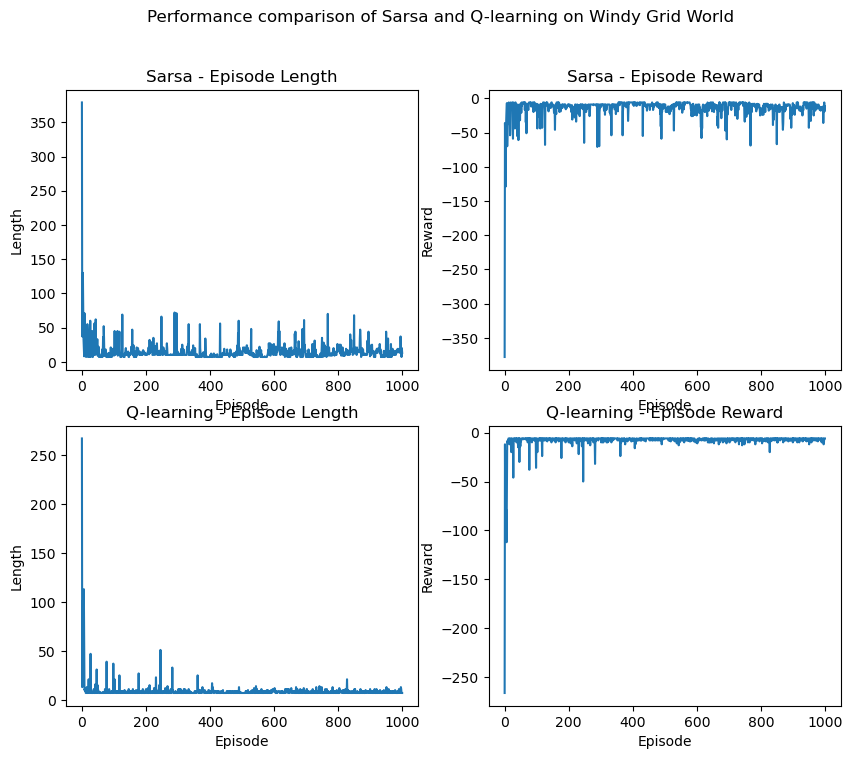

Optimal policy (Sarsa):
[[0 2 2 3 3 3 1 1 2 2]
 [3 3 3 0 0 1 3 1 2 1]
 [0 0 1 3 3 1 3 3 0 0]
 [1 0 3 0 3 3 3 0 2 2]
 [0 0 3 1 3 0 3 0 0 1]
 [3 2 2 3 0 3 3 0 2 1]
 [1 3 3 3 3 0 0 3 0 2]]
Optimal policy (Q-learning):
[[1 2 2 0 1 1 0 1 1 2]
 [1 2 2 3 3 3 3 1 3 3]
 [1 0 1 3 1 1 1 1 3 0]
 [3 3 3 3 3 3 3 0 2 0]
 [0 2 3 0 0 0 3 1 0 2]
 [0 3 0 3 3 3 0 0 2 3]
 [0 1 2 2 3 1 3 2 3 0]]


In [20]:
# Define the Windy Grid World environment
rows = 7
cols = 10
wind = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]
start = (3, 0)
goal = (3, 7)
env = WindyGridWorld(rows, cols, wind, start, goal)

# Run Sarsa algorithm
num_episodes = 1000
alpha = 0.9
epsilon = 0.1
gamma = 1
Q_sarsa, episode_lengths_sarsa, episode_rewards_sarsa = sarsa(env, num_episodes, alpha, epsilon, gamma)

# Run Q-learning algorithm
num_episodes = 1000
alpha = 0.9
epsilon = 0.1
gamma = 1
Q_qlearning, episode_lengths_qlearning, episode_rewards_qlearning = q_learning(env, num_episodes, alpha, epsilon, gamma)

# Find optimal policies
policy_sarsa = np.argmax(Q_sarsa, axis=2)
policy_qlearning = np.argmax(Q_qlearning, axis=2)

# Plot episode lengths and rewards
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Performance comparison of Sarsa and Q-learning on Windy Grid World')

axs[0, 0].plot(episode_lengths_sarsa)
axs[0, 0].set_title('Sarsa - Episode Length')
axs[0, 0].set_xlabel('Episode')
axs[0, 0].set_ylabel('Length')

axs[0, 1].plot(episode_rewards_sarsa)
axs[0, 1].set_title('Sarsa - Episode Reward')
axs[0, 1].set_xlabel('Episode')
axs[0, 1].set_ylabel('Reward')

axs[1, 0].plot(episode_lengths_qlearning)
axs[1, 0].set_title('Q-learning - Episode Length')
axs[1, 0].set_xlabel('Episode')
axs[1, 0].set_ylabel('Length')

axs[1, 1].plot(episode_rewards_qlearning)
axs[1, 1].set_title('Q-learning - Episode Reward')
axs[1, 1].set_xlabel('Episode')
axs[1, 1].set_ylabel('Reward')

plt.show()

# Print optimal policies
print('Optimal policy (Sarsa):')
print(policy_sarsa)

print('Optimal policy (Q-learning):')
print(policy_qlearning)

In [1]:
import numpy as np
import random
from collections import defaultdict
import matplotlib.pyplot as plt

class WindyGridWorldKing:
    def __init__(self, rows, cols, wind, start, goal):
        self.rows = rows
        self.cols = cols
        self.wind = wind
        self.start = start
        self.goal = goal
        self.action_space = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
        
    def reset(self):
        self.state = self.start
        return self.state
    
    def step(self, state, action):
        row, col = state
        wind_strength = self.wind[col]
        wind_deviation = np.random.choice([-1, 0, 1])  # select a random deviation from the wind strength
        wind = wind_strength + wind_deviation
        next_row, next_col = row, col
        
        if action == 'N':
            next_row = max(row - 1 - wind, 0)
        elif action == 'NE':
            next_row = max(row - 1 - wind, 0)
            next_col = min(col + 1, self.cols - 1)
        elif action == 'E':
            next_col = min(col + 1, self.cols - 1)
        elif action == 'SE':
            next_row = min(row + 1 - wind, self.rows - 1)
            next_col = min(col + 1, self.cols - 1)
        elif action == 'S':
            next_row = min(row + 1 - wind, self.rows - 1)
        elif action == 'SW':
            next_row = min(row + 1 - wind, self.rows - 1)
            next_col = max(col - 1, 0)
        elif action == 'W':
            next_col = max(col - 1, 0)
        elif action == 'NW':
            next_row = max(row - 1 - wind, 0)
            next_col = max(col - 1, 0)
            
        self.state = (next_row, next_col)
        
        if self.state == self.goal:
            reward = 0
            done = True
        else:
            reward = -1
            done = False
        
        return self.state, reward, done





In [13]:
def epsilon_greedy(Q, state, epsilon, action_space):
    if np.random.uniform() < epsilon:
        return random.choice(action_space)
    else:
        values = np.array([Q[state[0], state[1], action_space.index(a)] for a in action_space])
        return action_space[np.argmax(values)]

def sarsa_king(env, num_episodes, alpha, epsilon, gamma):
    Q = defaultdict(lambda: np.zeros(len(env.action_space)))
    episode_lengths = np.zeros(num_episodes)
    episode_rewards = np.zeros(num_episodes)
    
    for i in range(num_episodes):
        state = env.reset()
        action = epsilon_greedy(Q, state, epsilon, env.action_space)
        
        done = False
        episode_length = 0
        episode_reward = 0
        
        while not done:
            next_state, reward, done = env.step(state, action)
            next_action = epsilon_greedy(Q, next_state, epsilon, env.action_space)
            td_error = reward + gamma * Q[next_state][env.action_space.index(next_action)] - Q[state][env.action_space.index(action)]
            Q[state][env.action_space.index(action)] += alpha * td_error
            
            state = next_state
            action = next_action
            
            episode_length += 1
            episode_reward += reward
        
        episode_lengths[i] = episode_length
        episode_rewards[i] = episode_reward
        
    return Q, episode_lengths, episode_rewards


def q_learning_king(env, num_episodes, alpha, epsilon, gamma):
    Q = defaultdict(lambda: np.zeros(len(env.action_space)))
    episode_lengths = np.zeros(num_episodes)
    episode_rewards = np.zeros(num_episodes)
    
    for i in range(num_episodes):
        state = env.reset()
        
        done = False
        episode_length = 0
        episode_reward = 0
        
        while not done:
            action = epsilon_greedy(Q, state, epsilon, env.action_space)
            next_state, reward, done = env.step(state, action)
            td_error = reward + gamma * np.max(Q[next_state]) - Q[state][env.action_space.index(action)]
            Q[state][env.action_space.index(action)] += alpha * td_error
            
            state = next_state
            
            episode_length += 1
            episode_reward += reward
        
        episode_lengths[i] = episode_length
        episode_rewards[i] = episode_reward
        
    return Q, episode_lengths, episode_rewards

In [14]:
# Set up the environment
rows = 7
cols = 10
start = (3, 0)
goal = (3, 7)
wind = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]
env = WindyGridWorldKing(rows, cols, wind, start, goal)

# Set hyperparameters
num_episodes = 200
alpha = 0.5
epsilon = 0.1
gamma = 1.0

# Run SARSA and Q-learning algorithms
sarsa_Q, sarsa_lengths, sarsa_rewards = sarsa_king(env, num_episodes, alpha, epsilon, gamma)
q_learning_Q, q_learning_lengths, q_learning_rewards = q_learning_king(env, num_episodes, alpha, epsilon, gamma)


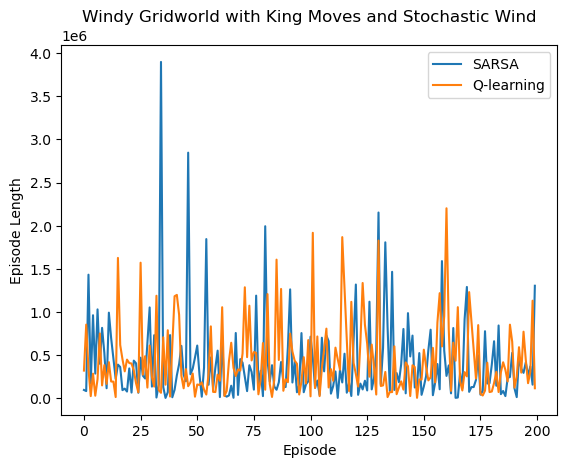

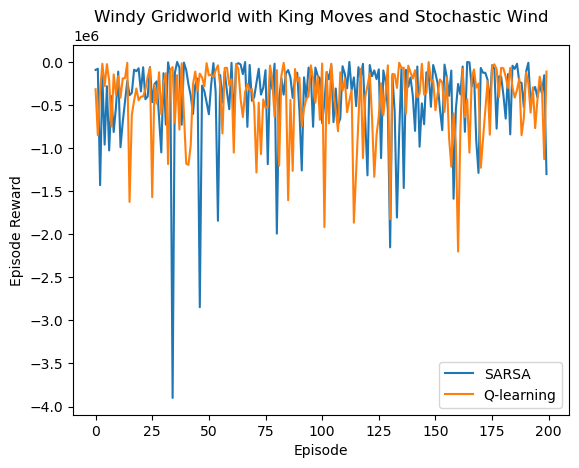

In [ ]:
# Plot episode lengths
plt.plot(sarsa_lengths, label='SARSA')
plt.plot(q_learning_lengths, label='Q-learning')
plt.xlabel('Episode')
plt.ylabel('Episode Length')
plt.title('Windy Gridworld with King Moves and Stochastic Wind')
plt.legend()
plt.show()

# Plot episode rewards
plt.plot(sarsa_rewards, label='SARSA')
plt.plot(q_learning_rewards, label='Q-learning')
plt.xlabel('Episode')
plt.ylabel('Episode Reward')
plt.title('Windy Gridworld with King Moves and Stochastic Wind')
plt.legend()
plt.show()

In [16]:
sarsa_rewards.mean()

-415507.71